# Load the data

In [1]:
import warnings
warnings.filterwarnings('ignore')
%pylab

# import custom functions
from Model_test import *
from Load_and_Clean_data import *
import pandas as pd
import pandas_profiling
from sklearn.decomposition import PCA


%matplotlib inline

pd.options.display.max_columns = 90

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Load the data, to a train test split and get a base model

In [2]:
df = load_raw_data()
df = clean_data(df)

# get features and target
X0,y0 = df_featues_target(df)

# save to a file
# save_X_y(X,y)

Loaded data into dataframe


In [3]:
X0.shape, y0.shape

((101763, 81), (101763,))

In [4]:
y0.unique()

array([0, 2, 1])

# Trian Test Split

In [5]:
X0_train, X0_test, y0_train, y0_test = scale_train_test_split(X0,y0)

# Base Model

In [6]:
models, model_names = train_model(X0_train, y0_train)

Running AdaBoost
Running Logistic Regresion
Running DecisionTree_gini


In [7]:
y0_train_predicts = predict_all(X0_train, y0_train, models)
y0_test_predicts = predict_all(X0_test, y0_test, models)

--- Train data ---
Model: AdaBoost
Accuracy: 0.583
F1-Score: 0.583
Confusion matrix, without normalization
[[35253    98  5794]
 [ 5294   154  3070]
 [17394   171  9094]]
Model: Logistic Regresion
Accuracy: 0.511
F1-Score: 0.511
Confusion matrix, without normalization
[[33545  6006  1594]
 [ 4877  2956   685]
 [16636  7529  2494]]
Model: DecisionTree_gini
Accuracy: 0.588
F1-Score: 0.588
Confusion matrix, without normalization
[[33962    61  7122]
 [ 4836   247  3435]
 [15860    99 10700]]


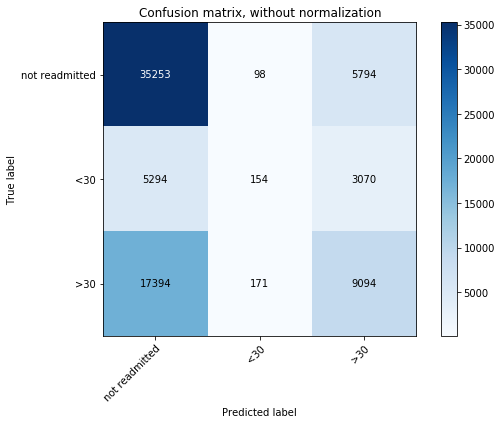

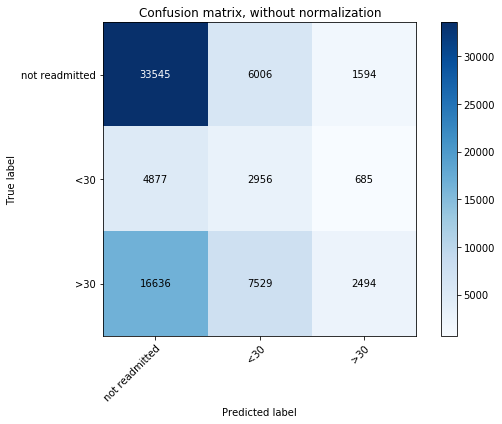

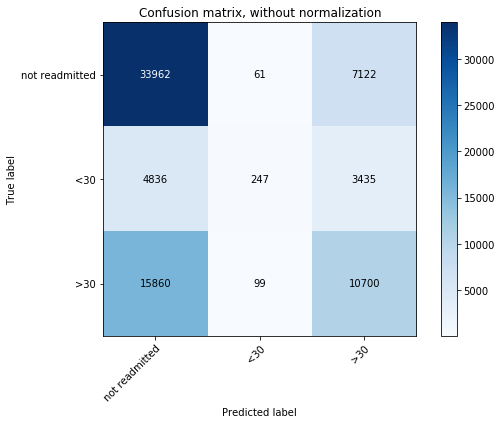

In [8]:
classes = ['not readmitted', '<30','>30']
print('--- Train data ---')
for i,y0_train_pred in enumerate(y0_train_predicts):
    display_acc_and_f1_score(y0_train, y0_train_pred, model_names[i])
    plot_confusion_matrix(y0_train, y0_train_pred,classes=classes, cmap = plt.cm.Blues)





--- Test data ---
Model: AdaBoost
Accuracy: 0.579
F1-Score: 0.579
Confusion matrix, without normalization
[[11761    35  1920]
 [ 1698    60  1081]
 [ 5901    69  2916]]
Model: Logistic Regresion
Accuracy: 0.512
F1-Score: 0.512
Confusion matrix, without normalization
[[11164  2042   510]
 [ 1515  1081   243]
 [ 5680  2417   789]]
Model: DecisionTree_gini
Accuracy: 0.573
F1-Score: 0.573
Confusion matrix, without normalization
[[11172    31  2513]
 [ 1526    52  1261]
 [ 5476    55  3355]]


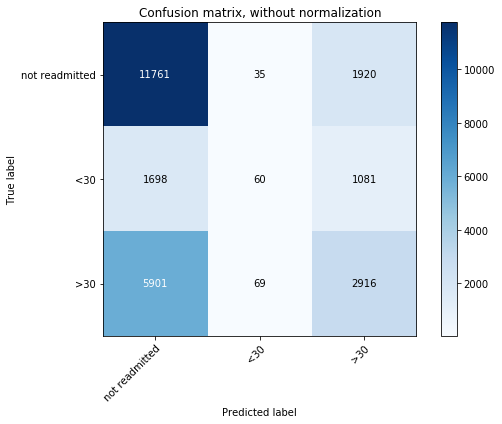

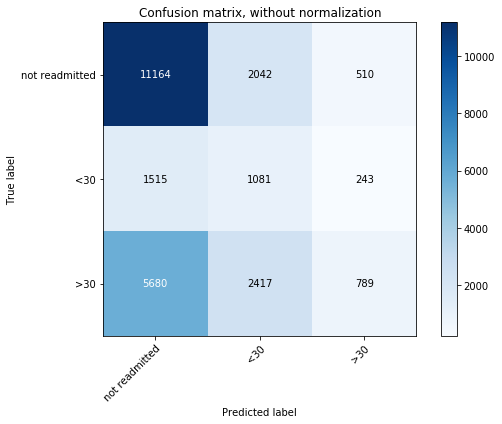

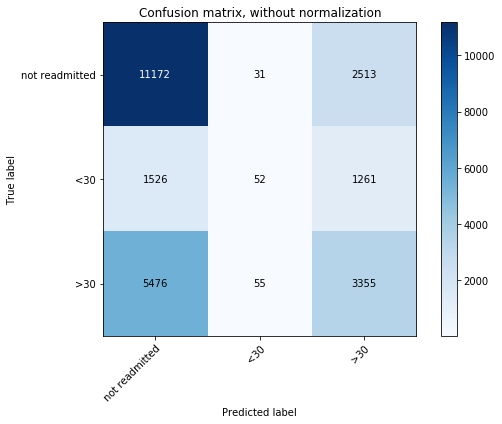

In [10]:
print('\n\n--- Test data ---')
for i,y0_test_pred in enumerate(y0_test_predicts):
    display_acc_and_f1_score(y0_test, y0_test_pred, model_names[i])
    plot_confusion_matrix(y0_test, y0_test_pred,
                          classes=classes,cmap = plt.cm.Blues)
    

# Iteration #2, balance the data
Doing a balanced test on the train data

In [11]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=109)
X_sm_train, y_sm_train = sm.fit_sample(X0_train, y0_train)

In [13]:
y0_train.value_counts(normalize=False)

0    41145
2    26659
1     8518
Name: readmitted, dtype: int64

In [14]:
np.unique(y_sm_train,return_counts=True)

(array([0, 1, 2]), array([41145, 41145, 41145]))

In [15]:
models, model_names = train_model(X_sm_train, y_sm_train)

Running AdaBoost
Running Logistic Regresion
Running DecisionTree_gini


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score


In [17]:
y_sm_train_predicts = predict_all(X_sm_train, y_sm_train, models)
y_sm_test_predicts = predict_all(X0_test, y0_test, models)

--- Train data ---
Model: AdaBoost
Accuracy: 0.564
F1-Score: 0.564
Confusion matrix, without normalization
[[27858  1621 11666]
 [ 5842 25625  9678]
 [14131 10908 16106]]
Model: Logistic Regresion
Accuracy: 0.442
F1-Score: 0.442
Confusion matrix, without normalization
[[22101 13412  5632]
 [11381 24600  5164]
 [13894 19340  7911]]
Model: DecisionTree_gini
Accuracy: 0.583
F1-Score: 0.583
Confusion matrix, without normalization
[[33064  1541  6540]
 [ 8508 28006  4631]
 [18577 11724 10844]]


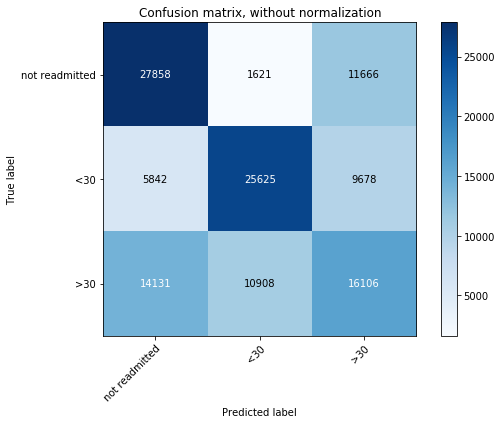

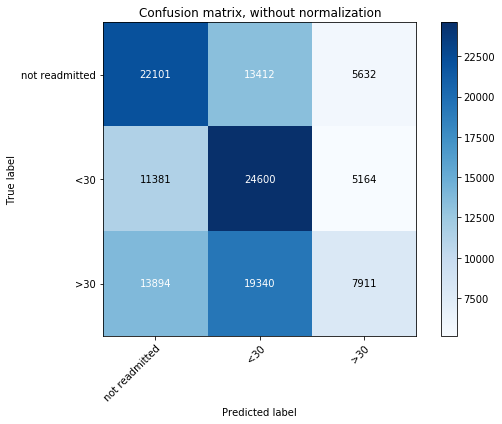

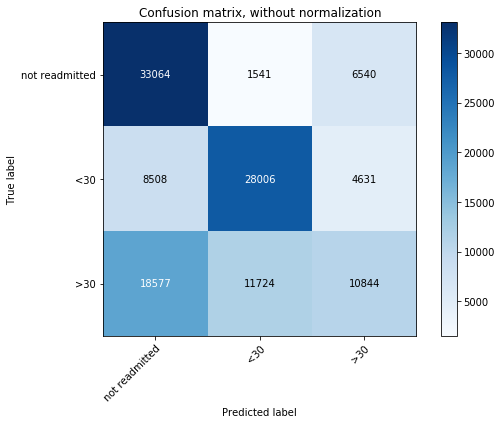

In [18]:

print('--- Train data ---')
for i, y_sm_train_pred in enumerate(y_sm_train_predicts):
    display_acc_and_f1_score(y_sm_train, y_sm_train_pred, model_names[i])
#     print("Accuracy is {0:.2f}".format(accuracy_score(y_sm_train, y_sm_train_pred)))
#     print("Precision is {0:.2f}".format(precision_score(y_sm_train, y_sm_train_pred)))
#     print("Recall is {0:.2f}".format(recall_score(y_sm_train, y_sm_train_pred)))
#     print("AUC is {0:.2f}".format(roc_auc_score(y_sm_train, y_sm_train_pred)))
    plot_confusion_matrix(y_sm_train, y_sm_train_pred,classes=classes,cmap = plt.cm.Blues)



--- Test data ---
Model: AdaBoost
Accuracy: 0.536
F1-Score: 0.536
Confusion matrix, without normalization
[[9337  546 3833]
 [1165  372 1302]
 [4366  586 3934]]
Model: Logistic Regresion
Accuracy: 0.422
F1-Score: 0.422
Confusion matrix, without normalization
[[7382 4419 1915]
 [ 812 1638  389]
 [3095 4064 1727]]
Model: DecisionTree_gini
Accuracy: 0.562
F1-Score: 0.562
Confusion matrix, without normalization
[[10952   553  2211]
 [ 1513   475   851]
 [ 5346   661  2879]]


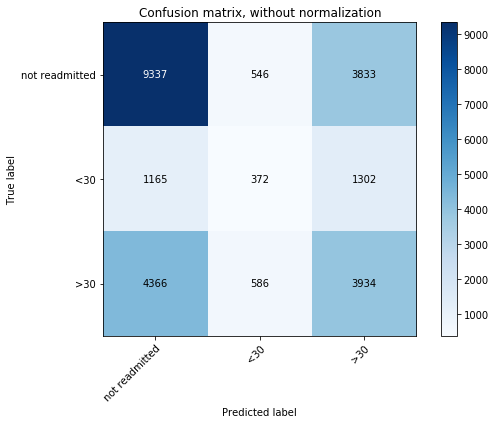

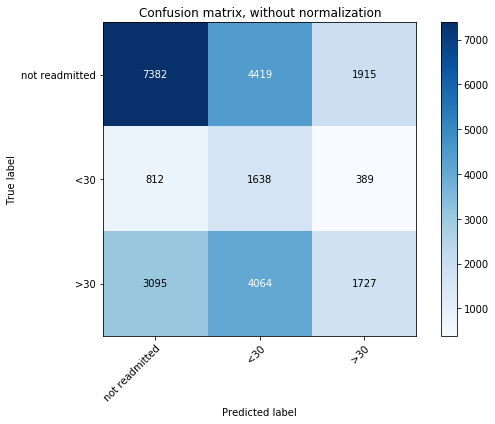

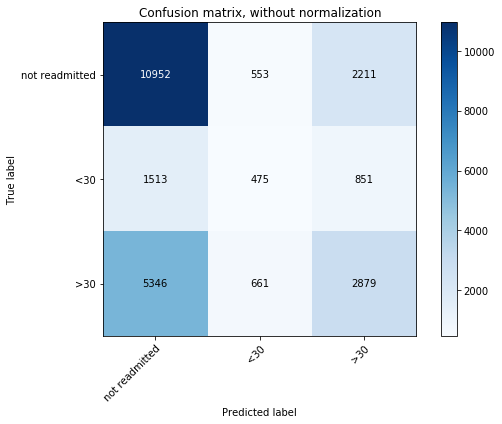

In [21]:
print('\n\n--- Test data ---')
for i,y_sm_test_pred in enumerate(y_sm_test_predicts):
    display_acc_and_f1_score(y0_test, y_sm_test_pred, model_names[i])
    plot_confusion_matrix(y0_test, y_sm_test_pred,classes=classes,cmap = plt.cm.Blues,normalize=False)

# Iteration #3, get 2 PCA components

In [22]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X0)
print(np.sum(pca.explained_variance_ratio_))

0.8743339507168156


In [23]:
pca_df = pd.DataFrame(principalComponents, columns= ['PCA1','PCA2'])

In [24]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = scale_train_test_split(pca_df,y0)

In [25]:
models, model_names = train_model(X_train_pca, y_train_pca)

Running AdaBoost
Running Logistic Regresion
Running DecisionTree_gini


In [26]:
y_train_pca_predicts = predict_all(X_train_pca, y_train_pca, models)
y_test_pca_predicts = predict_all(X_test_pca, y_test_pca, models)

--- Train data ---
Model: AdaBoost
Accuracy: 0.539
F1-Score: 0.539
Confusion matrix, without normalization
[[41138     2     5]
 [ 8509     4     5]
 [26652     2     5]]
Model: Logistic Regresion
Accuracy: 0.421
F1-Score: 0.421
Confusion matrix, without normalization
[[21662  8293 11190]
 [ 3783  2084  2651]
 [12646  5630  8383]]
Model: DecisionTree_gini
Accuracy: 0.542
F1-Score: 0.542
Confusion matrix, without normalization
[[40934    12   199]
 [ 8394    51    73]
 [26262    12   385]]


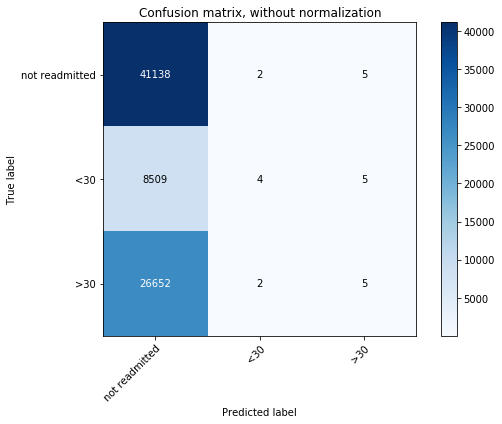

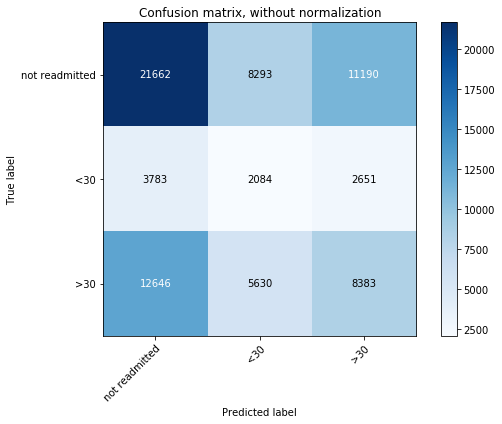

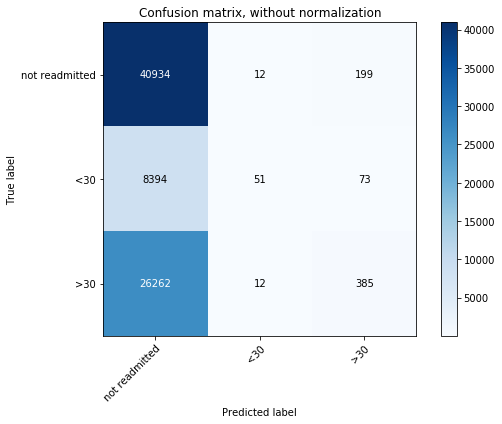

In [27]:
print('--- Train data ---')
for i, y_new_train_pred in enumerate(y_train_pca_predicts):
    display_acc_and_f1_score(y_train_pca, y_new_train_pred, model_names[i])
    plot_confusion_matrix(y_train_pca, y_new_train_pred,classes=classes,cmap = plt.cm.Blues)




--- Test data ---
Model: AdaBoost
Accuracy: 0.539
F1-Score: 0.539
Confusion matrix, without normalization
[[13710     4     2]
 [ 2838     0     1]
 [ 8883     1     2]]
Model: Logistic Regresion
Accuracy: 0.420
F1-Score: 0.420
Confusion matrix, without normalization
[[7192 2784 3740]
 [1280  658  901]
 [4174 1878 2834]]
Model: DecisionTree_gini
Accuracy: 0.537
F1-Score: 0.537
Confusion matrix, without normalization
[[13561    16   139]
 [ 2811     3    25]
 [ 8790     4    92]]


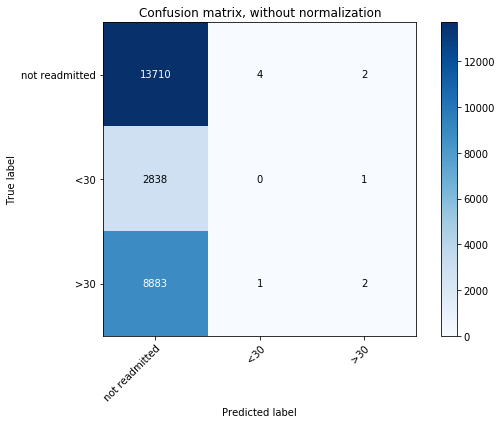

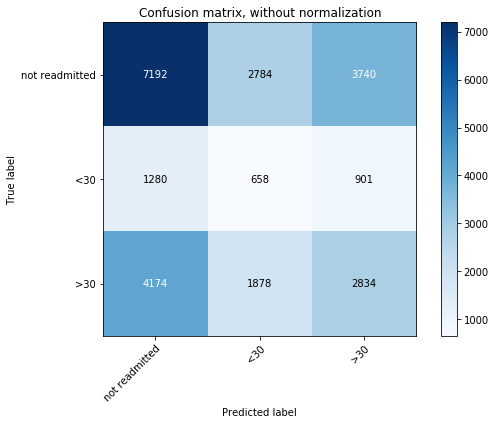

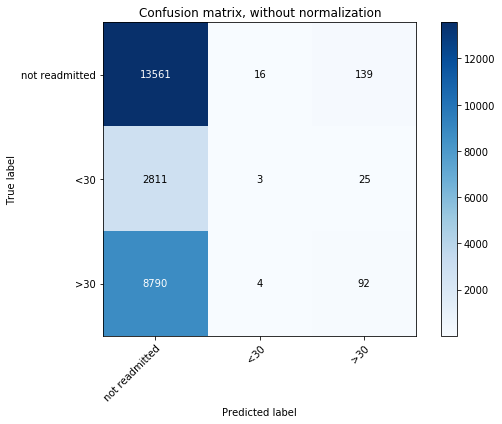

In [28]:
print('\n\n--- Test data ---')
for i,y_new_test_pred in enumerate(y_test_pca_predicts):
    display_acc_and_f1_score(y_test_pca, y_new_test_pred, model_names[i])
    plot_confusion_matrix(y_test_pca, y_new_test_pred,classes=classes,cmap = plt.cm.Blues)

# Let's drop the data with readmittance >30

In [69]:
df_reduced = df.copy()
df_reduced.readmitted = np.where(df_reduced.readmitted==2, 0, df_reduced.readmitted)
# [df.readmitted<2]
classes=['no readmittance', 'readmittance']

In [70]:
df.shape, df_reduced.shape

((101763, 40), (101763, 40))

In [71]:
df_reduced.readmitted.value_counts()

0    90406
1    11357
Name: readmitted, dtype: int64

In [72]:
X,y = df_featues_target(df_reduced)

In [73]:
X_train, X_test, y_train, y_test = scale_train_test_split(X,y)

In [74]:
models, model_names = train_model(X_train, y_train)

Running AdaBoost
Running Logistic Regresion
Running DecisionTree_gini


In [75]:
y_train_predicts = predict_all(X_train, y_train, models)
y_test_predicts = predict_all(np.array(X_test), np.array(y_test), models)

--- Train data ---
Model: AdaBoost
Accuracy: 0.888
F1-Score: 0.888
Confusion matrix, without normalization
[[67669   135]
 [ 8392   126]]
Model: Logistic Regresion
Accuracy: 0.691
F1-Score: 0.691
Confusion matrix, without normalization
[[48504 19300]
 [ 4321  4197]]
Model: DecisionTree_gini
Accuracy: 0.891
F1-Score: 0.891
Confusion matrix, without normalization
[[67707    97]
 [ 8185   333]]


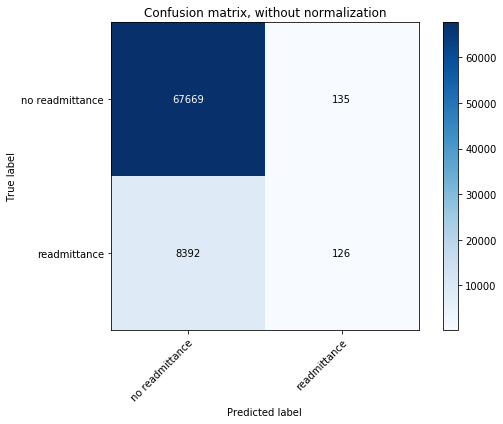

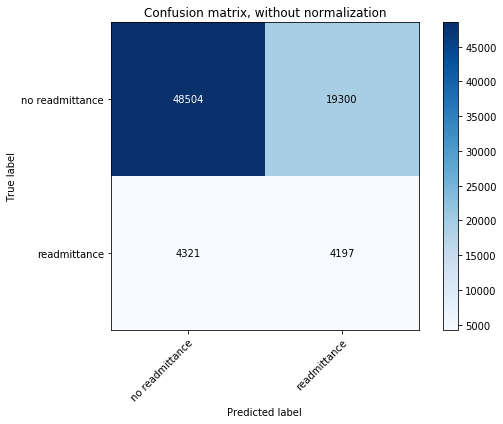

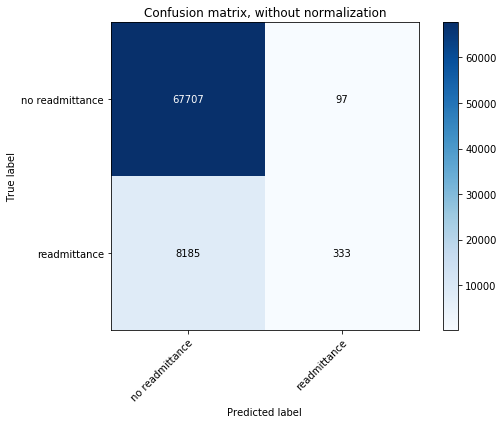

In [76]:
print('--- Train data ---')
for i, y_train_pred in enumerate(y_train_predicts):
    display_acc_and_f1_score(y_train, y_train_pred, model_names[i])
    plot_confusion_matrix(y_train, y_train_pred,classes,cmap = plt.cm.Blues)



--- Test data ---
Model: AdaBoost
Accuracy: 0.887
F1-Score: 0.887
Confusion matrix, without normalization
[[22551    51]
 [ 2818    21]]
2752


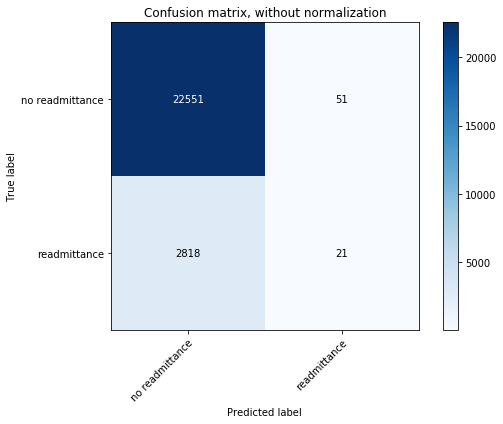

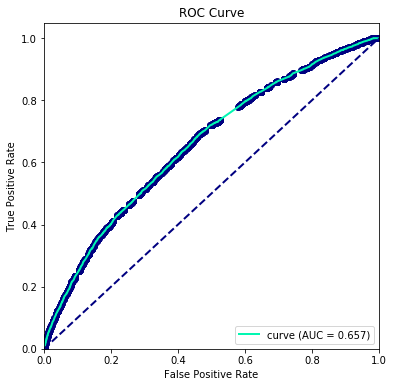

Model: Logistic Regresion
Accuracy: 0.682
F1-Score: 0.682
Confusion matrix, without normalization
[[15981  6621]
 [ 1467  1372]]
25439


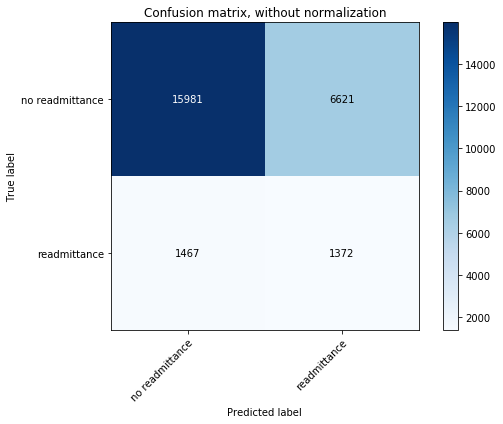

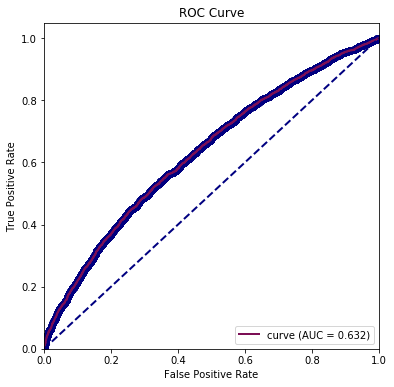

Model: DecisionTree_gini
Accuracy: 0.887
F1-Score: 0.887
Confusion matrix, without normalization
[[22515    87]
 [ 2786    53]]
111


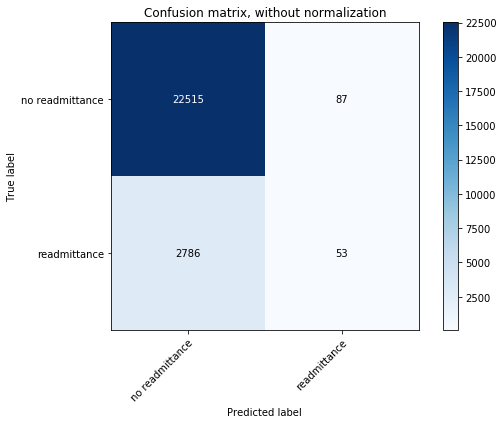

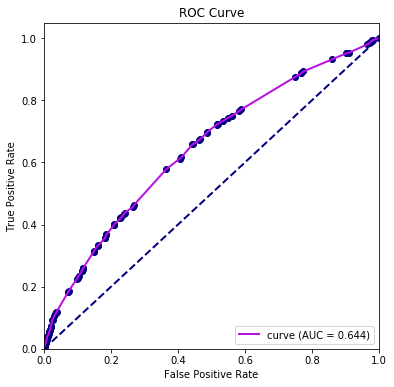

In [78]:
print('\n\n--- Test data ---')
for i,y_test_pred in enumerate(y_test_predicts):
    display_acc_and_f1_score(y_test, y_test_pred, model_names[i])
    plot_confusion_matrix(y_test, y_test_pred,classes,cmap = plt.cm.Blues)
    fig = plt.figure(figsize=(6,6))
    roc_auc(models[i].predict_proba(X_test)[:,1], y_test)

In [79]:
sm = SMOTE(random_state=109)
X_sm_train, y_sm_train = sm.fit_sample(X_train, y_train)

In [80]:
models, model_names = train_model(X_sm_train, y_sm_train)

Running AdaBoost
Running Logistic Regresion
Running DecisionTree_gini


In [81]:
y_new_train_predicts = predict_all(X_sm_train, y_sm_train, models)
y_new_test_predicts = predict_all(X_test, y_test, models)

--- Train data ---
Model: AdaBoost
Accuracy: 0.866
F1-Score: 0.866
Confusion matrix, without normalization
[[62851  4953]
 [13283 54521]]
Model: Logistic Regresion
Accuracy: 0.611
F1-Score: 0.611
Confusion matrix, without normalization
[[41281 26523]
 [26231 41573]]
Model: DecisionTree_gini
Accuracy: 0.855
F1-Score: 0.855
Confusion matrix, without normalization
[[63846  3958]
 [15660 52144]]


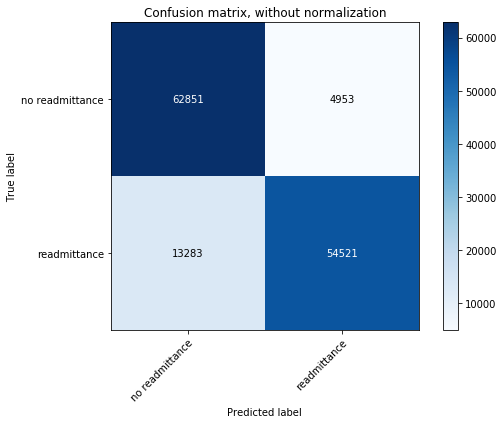

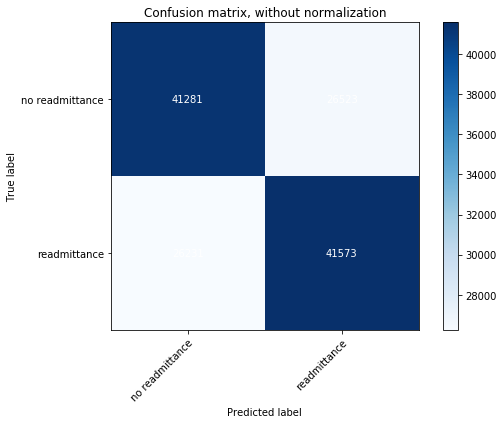

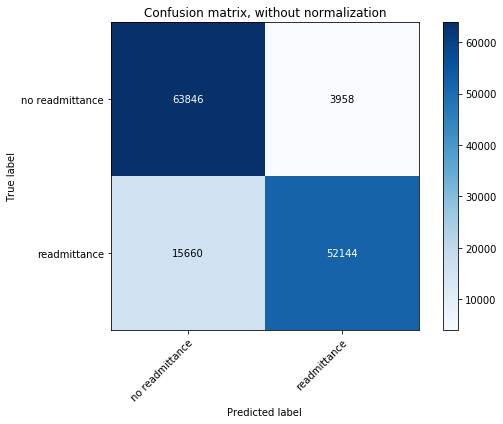

In [82]:
print('--- Train data ---')
for i, y_new_train_pred in enumerate(y_new_train_predicts):
    display_acc_and_f1_score(y_sm_train, y_new_train_pred, model_names[i])
    plot_confusion_matrix(y_sm_train, y_new_train_pred,classes,cmap = plt.cm.Blues)
    



--- Test data ---
Model: AdaBoost
Accuracy: 0.839
F1-Score: 0.839
Confusion matrix, without normalization
[[20883  1719]
 [ 2370   469]]
4089


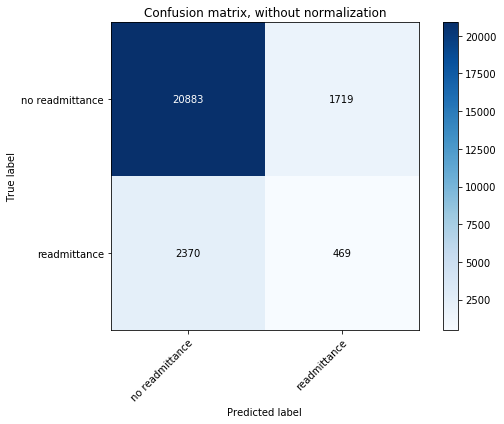

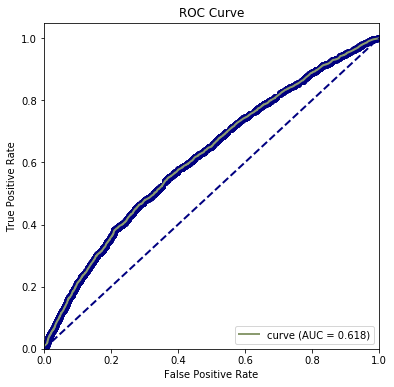

Model: Logistic Regresion
Accuracy: 0.600
F1-Score: 0.600
Confusion matrix, without normalization
[[13617  8985]
 [ 1195  1644]]
25439


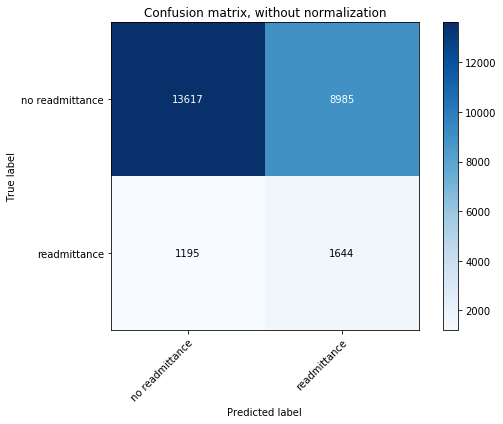

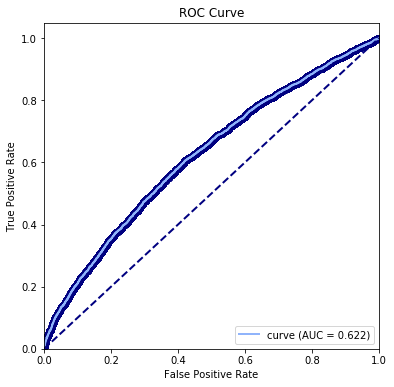

Model: DecisionTree_gini
Accuracy: 0.854
F1-Score: 0.854
Confusion matrix, without normalization
[[21259  1343]
 [ 2382   457]]
72


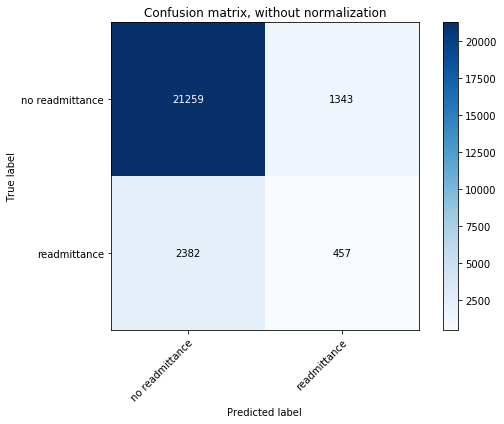

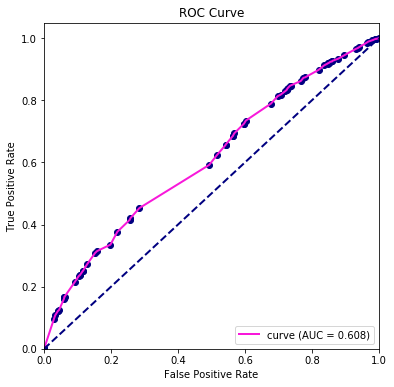

In [83]:
print('\n\n--- Test data ---')
for i,y_new_test_pred in enumerate(y_new_test_predicts):
    display_acc_and_f1_score(y_test, y_new_test_pred, model_names[i])
    plot_confusion_matrix(y_test, y_new_test_pred,classes,cmap = plt.cm.Blues)
    fig = plt.figure(figsize=(6,6))
    roc_auc(models[i].predict_proba(X_test)[:,1], y_test)

In [68]:
def roc_auc(pred, act, plot=True, label='curve'):
    prob = pred/pred.max() # normalize
    fpr, tpr, threshold = sklearn.metrics.roc_curve(act, prob, drop_intermediate=False)
    auc = sklearn.metrics.auc(fpr, tpr)
    print(len(fpr))
    if plot:
        plt.scatter(x=fpr, y=tpr, color='navy')
        rcolor = tuple(np.random.rand(3,1)[:,0])
        plt.plot(fpr, tpr, c=rcolor, lw=2, label=label + ' (AUC = %0.3f)' % auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

    return auc

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(8,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# But wait, let's be smarter and  do some data engineering

In [84]:
from Load_and_Clean_data import *
df_raw = load_raw_data()
print(df_raw.shape)
# df_raw = df_raw.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
print(df_raw.shape)

Loaded data into dataframe
(101766, 50)
(101766, 50)


In [85]:
df = clean_eng_data(df_raw)

In [90]:
df.head()


,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,0,0
1,Caucasian,Female,[10-20),1,1,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,1,1,2
2,AfricanAmerican,Female,[20-30),1,1,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,1,0
3,Caucasian,Male,[30-40),1,1,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,1,1,0
4,Caucasian,Male,[40-50),1,1,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,1,1,0


In [91]:
meds_cols =['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']
df = count_meds(df, meds_cols)


In [92]:
df = get_diagnosis(df, 'diag_1')
df = get_diagnosis(df, 'diag_2')
df = get_diagnosis(df, 'diag_3')
df.drop(columns = ['diag_1', 'diag_2', 'diag_3'], inplace=True)

converting diagnosis for diag_1
converting diagnosis for diag_2
converting diagnosis for diag_3


In [93]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,dosage_up_down,cat1_diag_1,cat1_diag_2,cat1_diag_3
0,Caucasian,Female,[0-10),6,25,1,41,0,1,0,0,0,1,None,None,0,0,0,0,4.0,-1.0,-1.0
1,Caucasian,Female,[10-20),1,1,3,59,0,18,0,0,0,9,None,None,1,1,2,2,9.0,4.0,9.0
2,AfricanAmerican,Female,[20-30),1,1,2,11,5,13,2,0,1,6,None,None,0,1,0,0,9.0,4.0,9.0
3,Caucasian,Male,[30-40),1,1,2,44,1,16,0,0,0,7,None,None,1,1,0,2,8.0,4.0,1.0
4,Caucasian,Male,[40-50),1,1,1,51,0,8,0,0,0,5,None,None,1,1,0,0,8.0,8.0,4.0


In [94]:
df = get_visits(df)

In [95]:
df = get_admissions(df)

In [96]:
df = get_procedures(df)

In [97]:
df = get_LAE_index(df)
df = get_LAMA_index(df)
df = get_glu_serum(df)
df = get_A1Cresults(df)

In [98]:
df.head()

,race,gender,age,discharge_disposition_id,time_in_hospital,num_medications,number_emergency,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,dosage_up_down,cat1_diag_1,cat1_diag_2,cat1_diag_3,total_visits,admission,LAE_index,LAMA
0,Caucasian,Female,[0-10),25,1,1,0,1,0,0,0,0,0,0,4.0,-1.0,-1.0,0,0,1,0
1,Caucasian,Female,[10-20),1,3,18,0,9,0,0,1,1,2,2,9.0,4.0,9.0,0,1,6,0
2,AfricanAmerican,Female,[20-30),1,2,13,0,6,0,0,0,1,0,0,9.0,4.0,9.0,3,1,5,0
3,Caucasian,Male,[30-40),1,2,16,0,7,0,0,1,1,0,2,8.0,4.0,1.0,0,1,5,0
4,Caucasian,Male,[40-50),1,1,8,0,5,0,0,1,1,0,0,8.0,8.0,4.0,0,1,4,0


In [108]:
df.dosage_up_down = df.dosage_up_down.astype(int)
# df.discharge_disposition_id = df.discharge_disposition_id.astype(int)
df.info()
df['diab_diagnosis'] = 0
df['diab_diagnosis'] = np.where(df['cat1_diag_1'] == 4.0, df['diab_diagnosis']+1, df['diab_diagnosis'])
df['diab_diagnosis'] = np.where(df['cat1_diag_2'] == 4.0, df['diab_diagnosis']+1, df['diab_diagnosis'])
df['diab_diagnosis'] = np.where(df['cat1_diag_3'] == 4.0, df['diab_diagnosis']+1, df['diab_diagnosis'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101765
Data columns (total 22 columns):
race                        101763 non-null object
gender                      101763 non-null object
age                         101763 non-null object
discharge_disposition_id    101763 non-null int64
time_in_hospital            101763 non-null int64
num_medications             101763 non-null int64
number_emergency            101763 non-null int64
number_diagnoses            101763 non-null int64
max_glu_serum               101763 non-null int64
A1Cresult                   101763 non-null int64
change                      101763 non-null int64
diabetesMed                 101763 non-null int64
readmitted                  101763 non-null int64
dosage_up_down              101763 non-null int64
cat1_diag_1                 101763 non-null float64
cat1_diag_2                 101763 non-null float64
cat1_diag_3                 101763 non-null float64
total_visits                10

In [109]:
df.head(25)

,race,gender,age,discharge_disposition_id,time_in_hospital,num_medications,number_emergency,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,dosage_up_down,cat1_diag_1,cat1_diag_2,cat1_diag_3,total_visits,admission,LAE_index,LAMA,diab_diagnosis
0,Caucasian,Female,[0-10),25,1,1,0,1,0,0,0,0,0,0,4.0,-1.0,-1.0,0,0,1,0,1
1,Caucasian,Female,[10-20),1,3,18,0,9,0,0,1,1,2,2,9.0,4.0,9.0,0,1,6,0,1
2,AfricanAmerican,Female,[20-30),1,2,13,0,6,0,0,0,1,0,0,9.0,4.0,9.0,3,1,5,0,1
3,Caucasian,Male,[30-40),1,2,16,0,7,0,0,1,1,0,2,8.0,4.0,1.0,0,1,5,0,1
4,Caucasian,Male,[40-50),1,1,8,0,5,0,0,1,1,0,0,8.0,8.0,4.0,0,1,4,0,1
5,Caucasian,Male,[50-60),1,3,16,0,9,0,0,0,1,2,0,1.0,1.0,4.0,0,1,6,0,1
6,Caucasian,Male,[60-70),1,4,21,0,7,0,0,1,1,0,0,1.0,1.0,9.0,0,0,4,0,0
7,Caucasian,Male,[70-80),1,5,12,0,8,0,0,0,1,2,0,1.0,2.0,4.0,0,1,7,0,1
8,Caucasian,Female,[80-90),1,13,28,0,8,0,0,1,1,0,0,1.0,1.0,9.0,0,1,8,0,0
9,Caucasian,Female,[90-100),3,12,18,0,8,0,0,1,1,0,0,1.0,8.0,2.0,0,0,5,0,0


In [110]:
dummy_df = pd.get_dummies(df)
cleaned_df = get_age_bin(dummy_df)

In [111]:
diagnosis_df = get_one_diagnosis(cleaned_df)

In [112]:
diagnosis_df = remove_patients(diagnosis_df)

number of patients 101763
number of patients 99340


# Test split the data

In [114]:
X = diagnosis_df.drop('readmitted',axis=1)
y = diagnosis_df['readmitted']

y = np.where(y>0, 1, 0)
y

array([0, 1, 0, ..., 0, 0, 0])

In [115]:
X_train, X_test, y_train, y_test = scale_train_test_split(X,y)

In [116]:
models, model_names = train_model(X_train, y_train)

Running AdaBoost
Running Logistic Regresion
Running DecisionTree_gini


In [117]:
y_train_predicts = predict_all(X_train, y_train, models)
y_test_predicts = predict_all(X_test, y_test, models)

--- Train data ---
Model: AdaBoost
Accuracy: 0.624
F1-Score: 0.624
Confusion matrix, without normalization
[[28631 10762]
 [17279 17833]]
Model: Logistic Regresion
Accuracy: 0.617
F1-Score: 0.617
Confusion matrix, without normalization
[[27832 11561]
 [16997 18115]]
Model: DecisionTree_gini
Accuracy: 0.631
F1-Score: 0.631
Confusion matrix, without normalization
[[28518 10875]
 [16640 18472]]


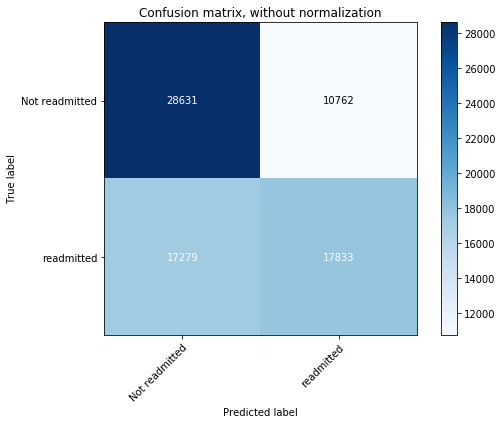

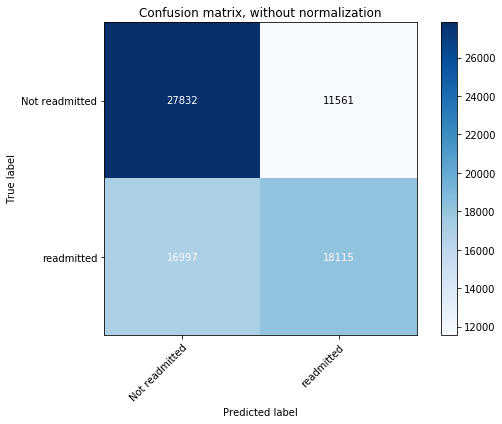

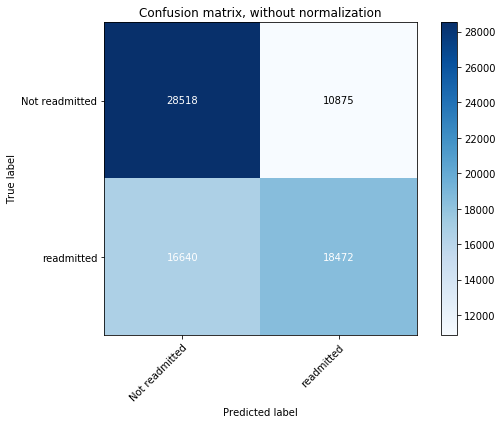

In [118]:
print('--- Train data ---')
classes = ['Not readmitted','readmitted','>30']
for i,y_train_pred in enumerate(y_train_predicts):
    display_acc_and_f1_score(y_train, y_train_pred, model_names[i])
    plot_confusion_matrix(y_train, y_train_pred, classes,cmap=plt.cm.Blues)



--- Test data ---
Model: AdaBoost
Accuracy: 0.620
F1-Score: 0.620
Confusion matrix, without normalization
[[9458 3673]
 [5770 5934]]
13924


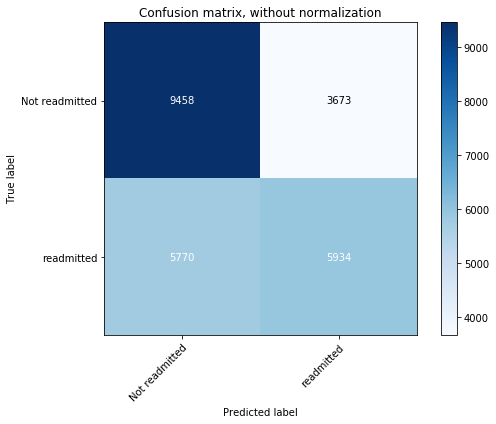

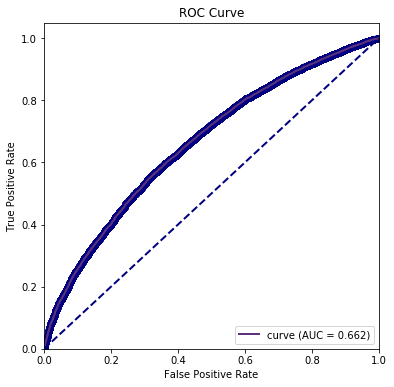

Model: Logistic Regresion
Accuracy: 0.618
F1-Score: 0.618
Confusion matrix, without normalization
[[9278 3853]
 [5631 6073]]
24535


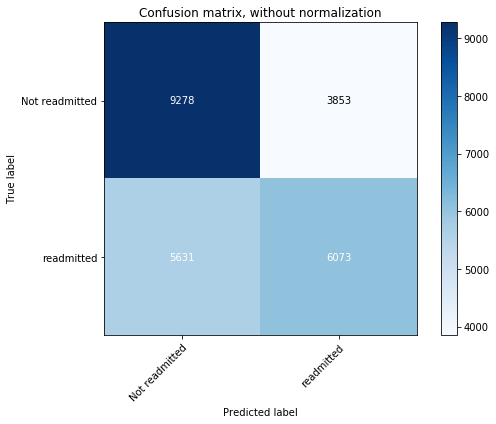

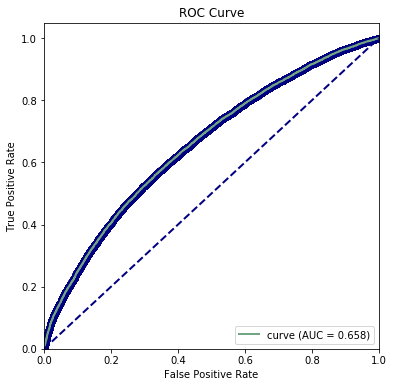

Model: DecisionTree_gini
Accuracy: 0.617
F1-Score: 0.617
Confusion matrix, without normalization
[[9268 3863]
 [5640 6064]]
167


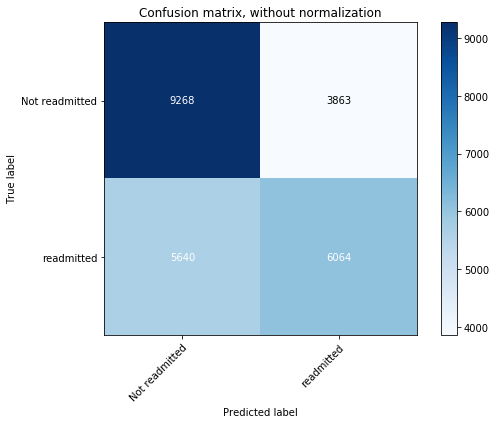

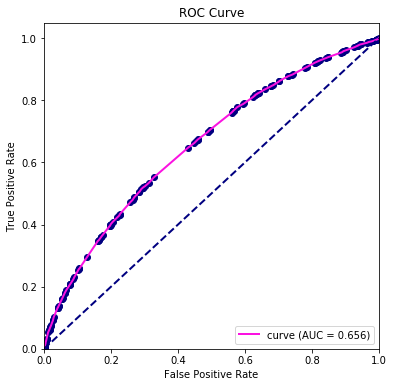

In [119]:
print('\n\n--- Test data ---')
for i,y_test_pred in enumerate(y_test_predicts):
    display_acc_and_f1_score(y_test, y_test_pred, model_names[i])
    plot_confusion_matrix(y_test, y_test_pred,classes,cmap=plt.cm.Blues)
    fig = plt.figure(figsize=(6,6))
    roc_auc(models[i].predict_proba(X_test)[:,1], y_test)

# Let's cut out some outliers

In [121]:
diagnosis_df.readmitted
diagnosis_df.readmitted = np.where(diagnosis_df.readmitted>0, 1, 0)

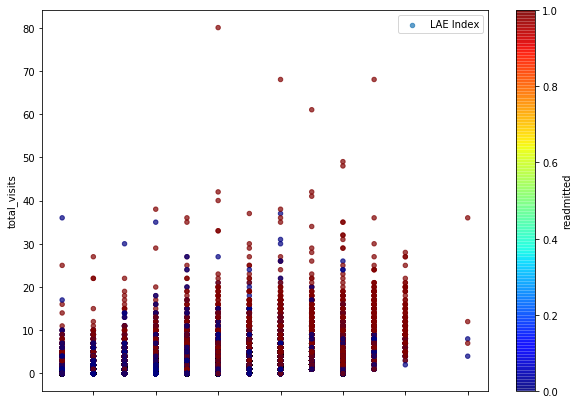

In [122]:
diagnosis_df.plot(kind="scatter", x="LAE_index", y="total_visits", alpha=0.7,
    label="LAE Index", figsize=(10,7),
    c="readmitted", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend();



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2d48f6a0>]],
      dtype=object)

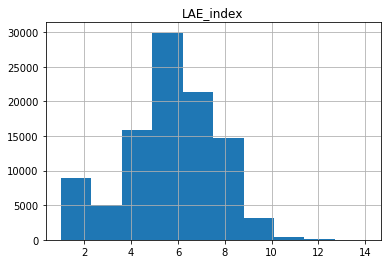

In [123]:
diagnosis_df.hist("LAE_index")

In [124]:
diagnosis_df.LAE_index.mean(),diagnosis_df.LAE_index.std()

(5.596074088987316, 2.069125406883949)

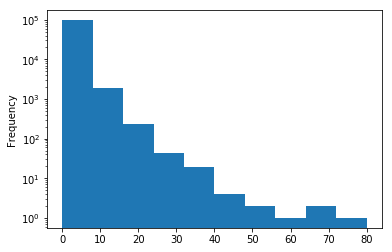

In [125]:
diagnosis_df.total_visits.plot(kind='hist',logy=True)

In [126]:
np.quantile(diagnosis_df.total_visits, 0.95)

5.0

In [127]:
diagnosis_df.total_visits.count(),diagnosis_df[diagnosis_df.total_visits>6].total_visits.count()

(99340, 3049)

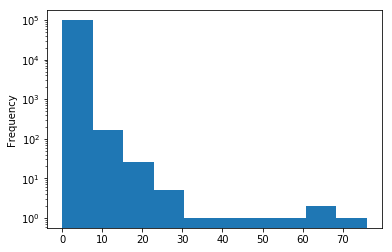

In [128]:
diagnosis_df.number_emergency.plot(kind='hist',logy=True)

In [129]:
np.quantile(diagnosis_df.number_emergency, 0.99)

3.0

18.0

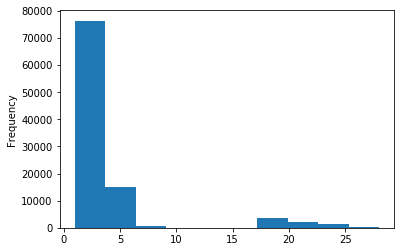

In [130]:
diagnosis_df.discharge_disposition_id.plot(kind='hist',logy=False)
np.quantile(diagnosis_df.discharge_disposition_id, 0.95)

In [131]:
diagnosis_df.shape

(99340, 33)

In [132]:
diagnosis_df.to_csv('dataset_diabetes/blog_datase.csv')

### Let's cut out at least 5 % of the data

In [133]:
lae_mean = diagnosis_df.LAE_index.mean()
lae_std = diagnosis_df.LAE_index.std()
print(diagnosis_df.shape)
diagnosis_df = diagnosis_df[(diagnosis_df.LAE_index> lae_mean-2*lae_std) & (diagnosis_df.LAE_index< lae_mean+2*lae_std)]
print(diagnosis_df.shape)


(99340, 33)
(92946, 33)


(92946, 33)
(89383, 33)


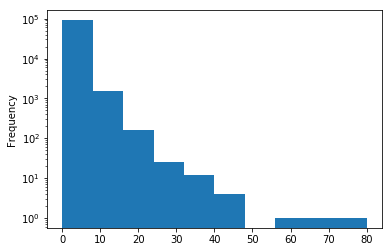

In [134]:
diagnosis_df.total_visits.plot(kind='hist',logy=True)
print(diagnosis_df.shape)
diagnosis_df = diagnosis_df[diagnosis_df.total_visits<=5]
print(diagnosis_df.shape)

(89383, 33)
(89326, 33)


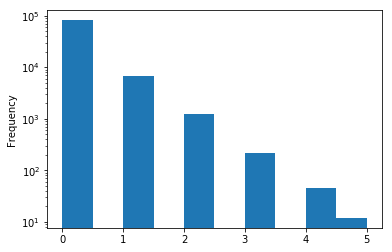

In [135]:
diagnosis_df.number_emergency.plot(kind='hist',logy=True)
print(diagnosis_df.shape)
diagnosis_df = diagnosis_df[diagnosis_df.number_emergency<=3]
print(diagnosis_df.shape)

In [224]:
diagnosis2_df = diagnosis_df.copy()
diagnosis2_df.drop(columns=['discharge_disposition_id'], inplace=True)

In [225]:
diagnosis2_df.head()
# diagnosis2_df.shape
# diagnosis2_df.columns

,time_in_hospital,num_medications,number_emergency,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,dosage_up_down,total_visits,admission,LAE_index,LAMA,diab_diagnosis,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,gender_Female,age_60_100,age_30_60,age_0_30,diagnosis_1,diagnosis_2,diagnosis_3,diagnosis_4,diagnosis_5,diagnosis_6,diagnosis_7,diagnosis_8,diagnosis_9
1,3,18,0,9,0,0,1,1,1,2,0,1,6,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,2,13,0,6,0,0,0,1,0,0,3,1,5,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,2,16,0,7,0,0,1,1,0,2,0,1,5,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1,8,0,5,0,0,1,1,0,0,0,1,4,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
5,3,16,0,9,0,0,0,1,1,0,0,1,6,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [226]:
# for xcol in diagnosis2_df.columns:
#     diagnosis2_df.hist(xcol)

In [279]:
X = diagnosis2_df.drop('readmitted',axis=1)
y = diagnosis2_df['readmitted']

X_train, X_test, y_train, y_test = scale_train_test_split(X,y)

In [140]:
models, model_names = train_model(X_train, y_train)

Running AdaBoost
Running Logistic Regresion
Running DecisionTree_gini


In [141]:
y_train_predicts = predict_all(X_train, y_train, models)
y_test_predicts = predict_all(X_test, y_test, models)

--- Train data ---
Model: AdaBoost
Accuracy: 0.613
F1-Score: 0.613
Confusion matrix, without normalization
[[26733  9455]
 [16463 14343]]
Model: Logistic Regresion
Accuracy: 0.609
F1-Score: 0.609
Confusion matrix, without normalization
[[24195 11993]
 [14223 16583]]
Model: DecisionTree_gini
Accuracy: 0.622
F1-Score: 0.622
Confusion matrix, without normalization
[[26816  9372]
 [15961 14845]]


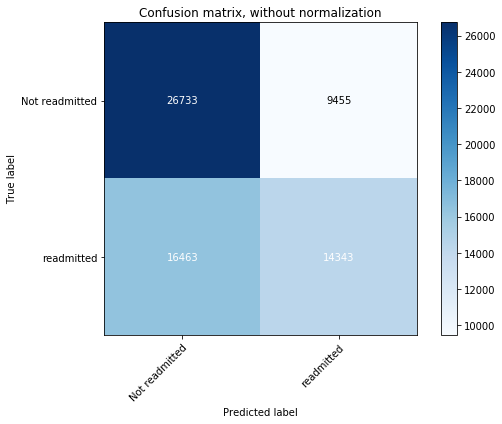

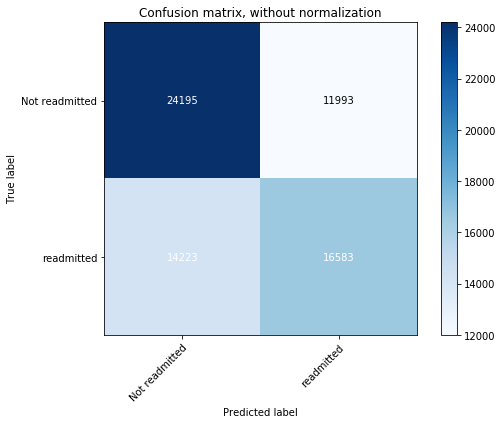

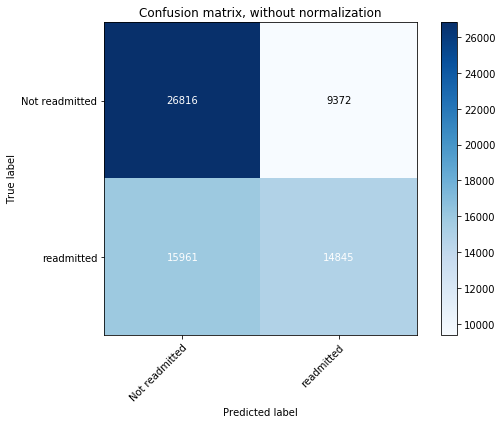

In [142]:
print('--- Train data ---')
classes = ['Not readmitted','readmitted','>30']
for i,y_train_pred in enumerate(y_train_predicts):
    display_acc_and_f1_score(y_train, y_train_pred, model_names[i])
    plot_confusion_matrix(y_train, y_train_pred, classes,cmap=plt.cm.Blues)



--- Test data ---
Model: AdaBoost
Accuracy: 0.615
F1-Score: 0.615
Confusion matrix, without normalization
[[8900 3163]
 [5432 4837]]
15918


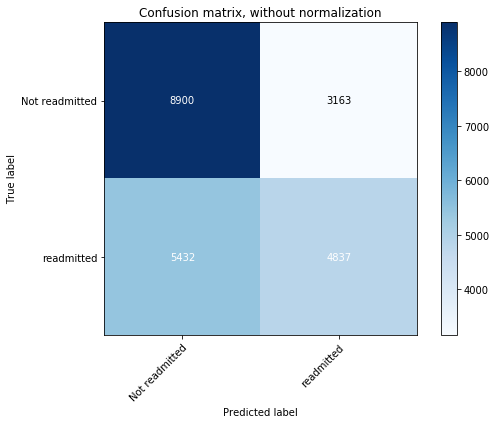

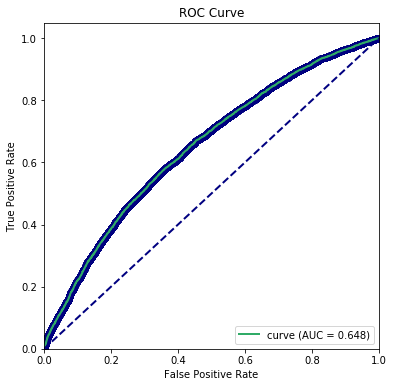

Model: Logistic Regresion
Accuracy: 0.609
F1-Score: 0.609
Confusion matrix, without normalization
[[8067 3996]
 [4739 5530]]
21858


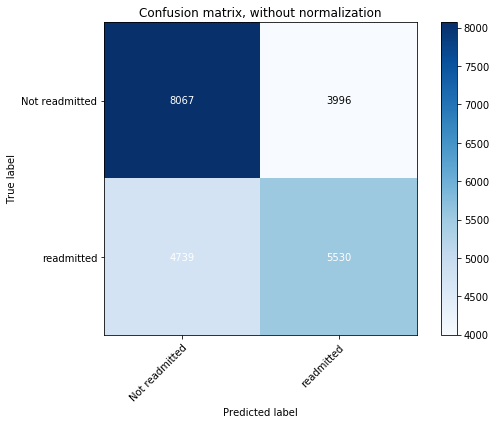

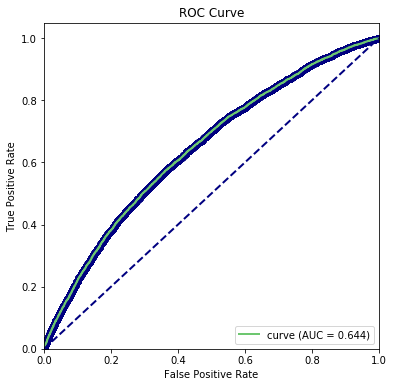

Model: DecisionTree_gini
Accuracy: 0.609
F1-Score: 0.609
Confusion matrix, without normalization
[[8739 3324]
 [5410 4859]]
139


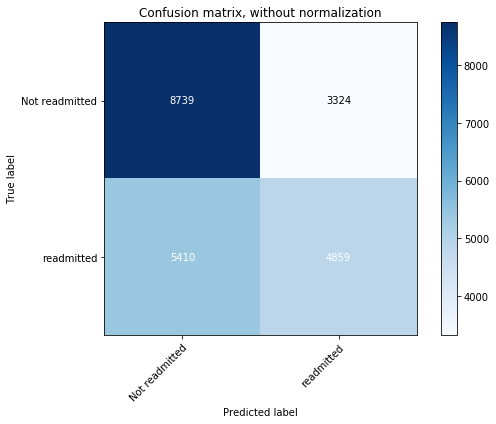

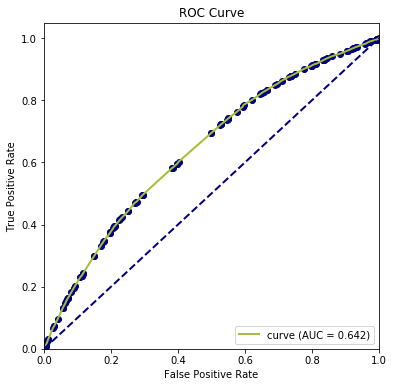

In [144]:


print('\n\n--- Test data ---')
for i,y_test_pred in enumerate(y_test_predicts):
    display_acc_and_f1_score(y_test, y_test_pred, model_names[i])
    plot_confusion_matrix(y_test, y_test_pred,classes,cmap=plt.cm.Blues)
    fig = plt.figure(figsize=(6,6))
    roc_auc(models[i].predict_proba(X_test)[:,1], y_test)

In [149]:
tree_grid = find_best_tree_clf(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    5.9s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:   10.6s finished


In [180]:
adaboost_grid = find_best_adaboost_clf(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   21.9s
[Parallel(n_jobs=2)]: Done 125 out of 125 | elapsed:   58.3s finished


In [152]:
log_grid = find_best_logistic(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.2s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    8.8s finished


In [183]:
adaboost_grid.best_estimator_

Pipeline(memory=None,
     steps=[('clf', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=75, random_state=None))])

Model: adaboost
Accuracy: 0.614
F1-Score: 0.614
Normalized confusion matrix
[[0.73795905 0.26204095]
 [0.53121044 0.46878956]]
18769


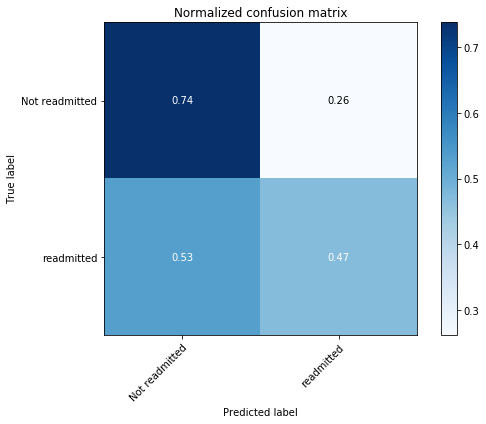

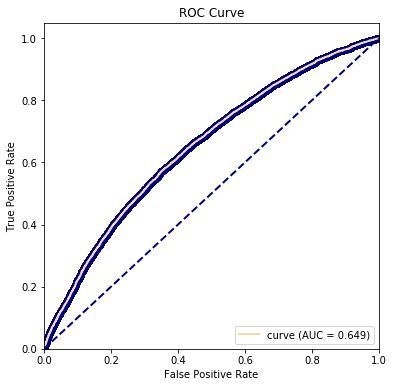

0.6492458277297992

In [182]:
y_test_pred = adaboost_grid.best_estimator_.predict(X_test)
display_acc_and_f1_score(y_test, y_test_pred, 'adaboost')
plot_confusion_matrix(y_test, y_test_pred,classes,cmap=plt.cm.Blues,normalize=True)
fig = plt.figure(figsize=(6,6))
roc_auc(adaboost_grid.best_estimator_.predict_proba(X_test)[:,1], y_test)

In [155]:
log_grid.best_estimator_

Pipeline(memory=None,
     steps=[('logistic', LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

Model: logistic
Accuracy: 0.609
F1-Score: 0.609
Normalized confusion matrix
[[0.6785211  0.3214789 ]
 [0.47200312 0.52799688]]
18479


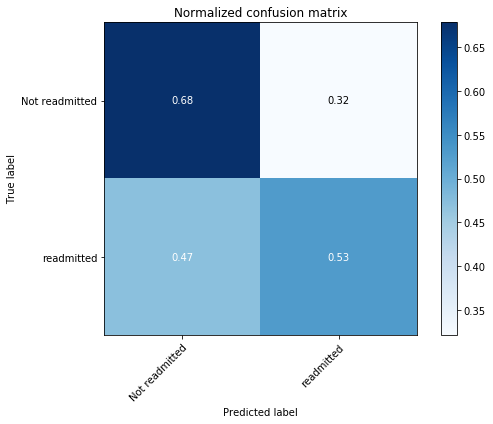

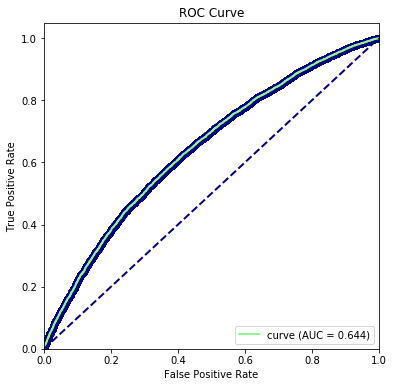

0.6441100515667628

In [162]:

y_test_pred = log_grid.best_estimator_.predict(X_test)
display_acc_and_f1_score(y_test, y_test_pred, 'logistic')
plot_confusion_matrix(y_test, y_test_pred,classes,cmap=plt.cm.Blues, normalize=True)
fig = plt.figure(figsize=(6,6))
roc_auc(log_grid.best_estimator_.predict_proba(X_test)[:,1], y_test)

In [157]:
tree_grid.best_estimator_

Pipeline(memory=None,
     steps=[('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

Model: logistic
Accuracy: 0.612
F1-Score: 0.612
Normalized confusion matrix
[[0.70902761 0.29097239]
 [0.50238582 0.49761418]]
33


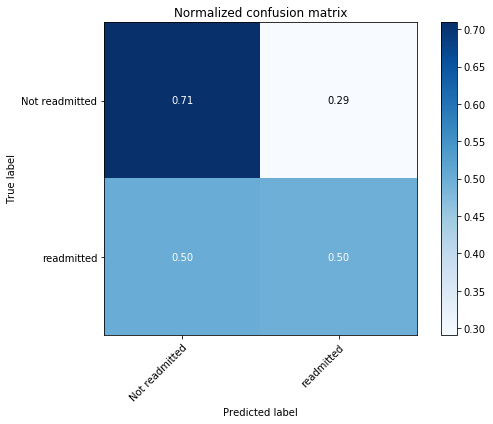

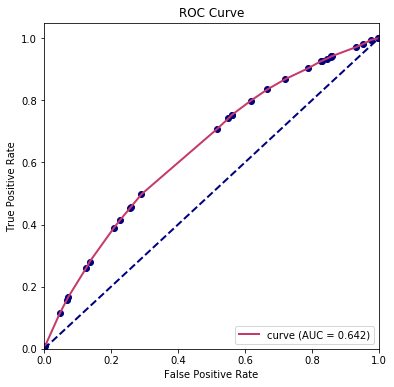

0.6418261797520688

In [164]:
y_test_pred = tree_grid.best_estimator_.predict(X_test)
display_acc_and_f1_score(y_test, y_test_pred, 'logistic')
plot_confusion_matrix(y_test, y_test_pred,classes,cmap=plt.cm.Blues, normalize=True)
fig = plt.figure(figsize=(6,6))
roc_auc(tree_grid.best_estimator_.predict_proba(X_test)[:,1], y_test)

In [147]:
def find_best_tree_clf(X_train,y_train):
    dtree_clf = DecisionTreeClassifier()
    pipe = Pipeline([('clf', dtree_clf)])
    param_grid = [{'clf__criterion':['gini','entropy'],
                  'clf__max_depth':[2,3,5,10,15],
                  'clf__min_samples_split':[2,5,6]}]
    grid = GridSearchCV(pipe, param_grid=param_grid, cv= 5, verbose=1,n_jobs=2)
    
    grid.fit(X_train, y_train)
    return grid

In [181]:
def find_best_adaboost_clf(X_train,y_train):
    
    adaboost_clf = AdaBoostClassifier()
    
    

    pipe = Pipeline([('clf', adaboost_clf)])
    param_grid = [{'clf__n_estimators':[5,10,25,50, 75,100,125],
                  'clf__learning_rate':[0.001, 0.1, 1, 10, 100]}]
    grid = GridSearchCV(pipe, param_grid=param_grid, cv= 5, verbose=1,n_jobs=2)
    
    grid.fit(X_train, y_train)
    return grid

In [150]:
def find_best_logistic(X_train, y_train):
    logistic = LogisticRegression(fit_intercept = False)
    pipe = Pipeline([('logistic',logistic)])
    C = np.logspace(-4,4,5)
    penalty = ['l1','l2']
    
    parameters = dict(logistic__C = C, 
                     logistic__penalty=penalty)
    grid = GridSearchCV(pipe, param_grid=parameters, cv=5, verbose=1, n_jobs=2)
    
    grid.fit(X_train, y_train)
    return grid

# Select Adaboost, look at the features and remove the least important

In [220]:
# from sklearn.externals import joblib
# joblib.dump(adaboost_grid.best_estimator_, 'filename.pkl')
best_model = adaboost_grid.best_estimator_.steps[0][1]

In [223]:
len(best_model.feature_importances_)

31

In [229]:
features_df =  pd.DataFrame(best_model.feature_importances_, X.columns)
features_df.columns = ['importance']

In [230]:
features_df.sort_values(by='importance', ascending=False)

,importance
num_medications,0.213333
total_visits,0.160000
number_diagnoses,0.106667
LAE_index,0.066667
race_Caucasian,0.053333
dosage_up_down,0.053333
race_AfricanAmerican,0.053333
time_in_hospital,0.040000
diagnosis_1,0.026667
diabetesMed,0.026667


In [201]:
features_df.shape

(31, 1)

In [231]:
# drop_columns = ['LAMA', 'diagnosis_7', 'age_30_60', 'diagnosis_3', 'dosage_up_down_3', 
#                 'diagnosis_5', 'dosage_up_down_-4', 'dosage_up_down_4','dosage_up_down_2', 'dosage_up_down_1', 
#                 'dosage_up_down_-3']
drop_columns = ['diagnosis_7', 'race_Asian', 'age_0_30', 'age_30_60', 'race_Hispanic', 'LAMA','diagnosis_9']

In [233]:
adab_df = diagnosis2_df.drop(columns=drop_columns)
X = adab_df.drop('readmitted',axis=1)
y = adab_df['readmitted']

X_train, X_test, y_train, y_test = scale_train_test_split(X,y)

In [234]:
final_adaboost = find_best_adaboost_clf(X_train, y_train)





Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   32.9s
[Parallel(n_jobs=2)]: Done 175 out of 175 | elapsed:  2.0min finished


Running AdaBoost
Running Logistic Regresion
Running DecisionTree_gini


Model: Final Adaboost
Accuracy: 0.614
F1-Score: 0.614
Normalized confusion matrix
[[0.73812484 0.26187516]
 [0.53228162 0.46771838]]
20264


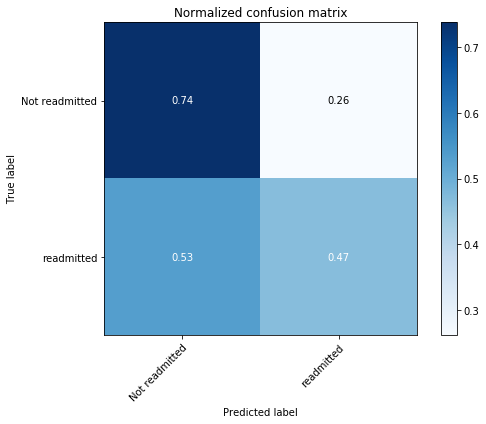

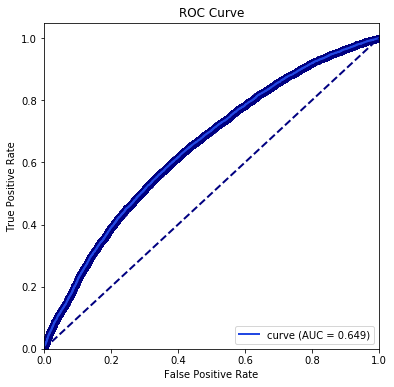

0.6491526087191788

In [235]:
y_test_pred = final_adaboost.best_estimator_.predict(X_test)
display_acc_and_f1_score(y_test, y_test_pred, 'Final Adaboost')
plot_confusion_matrix(y_test, y_test_pred,classes,cmap=plt.cm.Blues,normalize=True)
fig = plt.figure(figsize=(6,6))
roc_auc(final_adaboost.best_estimator_.predict_proba(X_test)[:,1], y_test)

# Let's look at the best tree regression

In [240]:
cols = diagnosis2_df.drop('readmitted', axis=1).columns

In [269]:
best_model = tree_grid.best_estimator_.steps[0][1]
best_model.feature_importances_
cols

Index(['time_in_hospital', 'num_medications', 'number_emergency',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'change',
       'diabetesMed', 'dosage_up_down', 'total_visits', 'admission',
       'LAE_index', 'LAMA', 'diab_diagnosis', 'race_AfricanAmerican',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'gender_Female',
       'age_60_100', 'age_30_60', 'age_0_30', 'diagnosis_1', 'diagnosis_2',
       'diagnosis_3', 'diagnosis_4', 'diagnosis_5', 'diagnosis_6',
       'diagnosis_7', 'diagnosis_8', 'diagnosis_9'],
      dtype='object')

In [241]:
best_model = tree_grid.best_estimator_.steps[0][1]
features_df =  pd.DataFrame(best_model.feature_importances_, cols)
features_df.columns = ['importance']
features_df.sort_values(by='importance', ascending=False)

,importance
total_visits,0.742535
number_diagnoses,0.121025
diabetesMed,0.038914
age_60_100,0.033916
num_medications,0.022513
dosage_up_down,0.010509
admission,0.009541
time_in_hospital,0.006906
age_30_60,0.004349
LAE_index,0.004042


In [242]:
to_drop = ['LAMA', 'diagnosis_1', 'diagnosis_8', 'diagnosis_7','diagnosis_5', 'diagnosis_4', 'diagnosis_3', 'diagnosis_2', 'age_0_30',
          'diab_diagnosis','number_emergency', 'A1Cresult','gender_Female', 'race_Hispanic','race_Caucasian', 'change','race_AfricanAmerican','diagnosis_9']

In [243]:
tree_df = diagnosis2_df.drop(columns=to_drop)
X = tree_df.drop('readmitted',axis=1)
y = tree_df['readmitted']

X_train, X_test, y_train, y_test = scale_train_test_split(X,y)

In [245]:
final_tree = find_best_tree_clf(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    6.6s finished


Model: Final Adaboost
Accuracy: 0.611
F1-Score: 0.611
Normalized confusion matrix
[[0.70272735 0.29727265]
 [0.49615347 0.50384653]]
9


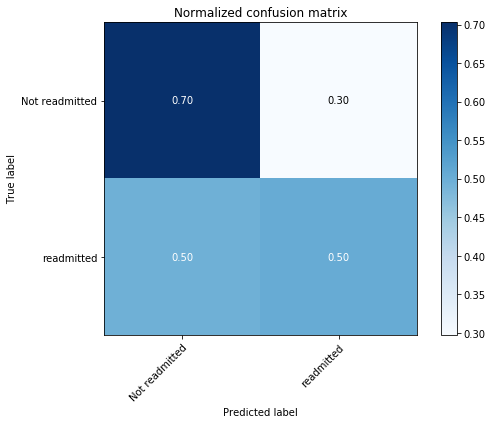

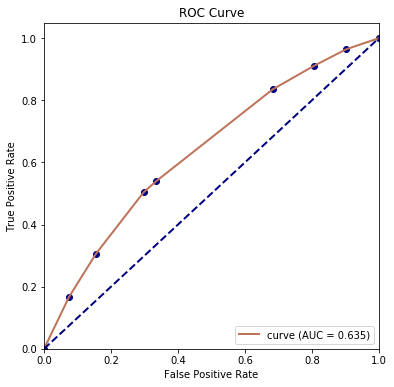

0.6354533616874121

In [246]:
y_test_pred = final_tree.best_estimator_.predict(X_test)
display_acc_and_f1_score(y_test, y_test_pred, 'Final Adaboost')
plot_confusion_matrix(y_test, y_test_pred,classes,cmap=plt.cm.Blues,normalize=True)
fig = plt.figure(figsize=(6,6))
roc_auc(final_tree.best_estimator_.predict_proba(X_test)[:,1], y_test)

# Look at the Logistic regression

In [276]:
best_model = log_grid.best_estimator_.steps[0][1]
features_df =  pd.DataFrame(best_model.coef_[0],cols)
features_df.columns = ['importance']
features_df.sort_values(by='importance', ascending=False)

,importance
total_visits,0.406236
number_diagnoses,0.160613
race_Caucasian,0.088111
diabetesMed,0.085875
race_AfricanAmerican,0.073716
age_60_100,0.068624
LAE_index,0.060526
diab_diagnosis,0.042898
diagnosis_1,0.030978
diagnosis_4,0.023046


In [281]:
to_drop = ['LAMA','num_medications','diagnosis_3','race_Hispanic','number_emergency', 'age_30_60']

log_df = diagnosis2_df.drop(columns=to_drop)
X = log_df.drop('readmitted',axis=1)
y = log_df['readmitted']

X_train, X_test, y_train, y_test = scale_train_test_split(X,y)

In [282]:
final_log = find_best_logistic(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.3s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    8.9s finished


Model: Final Logistic
Accuracy: 0.609
F1-Score: 0.609
Normalized confusion matrix
[[0.6784382  0.3215618 ]
 [0.47190574 0.52809426]]
18479


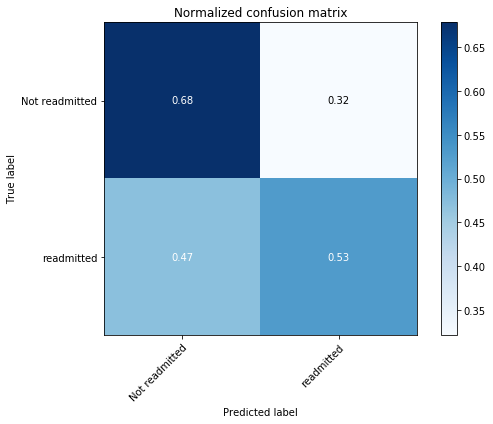

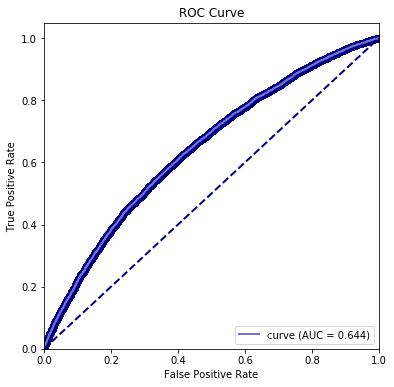

0.6441087680142459

In [283]:
y_test_pred = final_log.best_estimator_.predict(X_test)
display_acc_and_f1_score(y_test, y_test_pred, 'Final Logistic')
plot_confusion_matrix(y_test, y_test_pred,classes,cmap=plt.cm.Blues,normalize=True)
fig = plt.figure(figsize=(6,6))
roc_auc(final_log.best_estimator_.predict_proba(X_test)[:,1], y_test)

In [286]:
best_model = final_log.best_estimator_.steps[0][1]
features_df =  pd.DataFrame(best_model.coef_[0],log_df.drop('readmitted',axis=1).columns)
features_df.columns = ['importance']
features_df.sort_values(by='importance', ascending=False)

,importance
total_visits,0.406272
number_diagnoses,0.160616
race_Caucasian,0.088091
diabetesMed,0.085875
race_AfricanAmerican,0.073700
age_60_100,0.068626
LAE_index,0.060152
diab_diagnosis,0.042899
diagnosis_1,0.031009
diagnosis_4,0.023062


ValueError: zero-dimensional arrays cannot be concatenated

In [277]:
from scipy.stats import norm


def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

In [111]:
def find_best_tree_clf(X_train,y_train):
    dtree_clf = DecisionTreeClassifier()
    pipe = Pipeline([('clf', dtree_clf)])
    param_grid = [{'clf__criterion':['gini','entropy'],
                  'clf__max_depth':[2,5,10,15,20],
                  'clf__min_samples_split':[2,5,6,10]}]
    grid = GridSearchCV(pipe, param_grid=param_grid, cv= 5, verbose=1,n_jobs=2)
    
    grid.fit(X_train, y_train)
    return grid

In [157]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
#from sklearn.metrics import cross_validation  #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search




In [158]:

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [ ]:
xgb1.fit(X_train, y_train,eval_metric='auc')

In [ ]:
y_test_pred = xgb1.predict(X_test)
y_train_pred = xgb1.predict(X_train)